In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [3]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
df = pd.merge(ride_data, city_data, how='left', on='city')
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
# Combine the data into a single dataset
df = city_data.merge(ride_data)
# Display the data table for preview
df.head()

In [75]:
# filter dataframe by type
# df[conditional statement]
urban_df = df[df["type"] == "Urban"]
suburban_df = df[df["type"] == "Suburban"]
rural_df = df[df["type"] == "Rural"]


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [36]:
# avg fare per city, ride count per city, number of drivers
avg_fare_urban = urban_df.groupby('city').mean()["fare"]
driver_count_urban = urban_df.groupby('city').mean()["driver_count"]
ride_total_urban = urban_df.groupby('city').count()["ride_id"]

In [37]:
avg_fare_suburban = suburban_df.groupby('city').mean()["fare"]
driver_count_suburban = suburban_df.groupby('city').mean()["driver_count"]
ride_total_suburban = suburban_df.groupby('city').count()["ride_id"]

In [38]:
avg_fare_rural = rural_df.groupby('city').mean()["fare"]
driver_count_rural = rural_df.groupby('city').mean()["driver_count"]
ride_total_rural = rural_df.groupby('city').count()["ride_id"]

## Bubble Plot of Ride Sharing Data

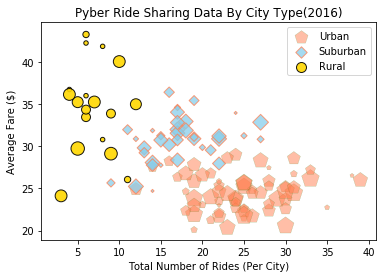

In [91]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types


plt.scatter(x=ride_total_urban, y=avg_fare_urban, s=5 * driver_count_urban, marker="p", facecolors="coral", edgecolors="green",
            alpha=.5, label="Urban", linewidths=.2)
plt.scatter(x=ride_total_suburban, y=avg_fare_suburban, s=5 * driver_count_suburban, marker="D", facecolors="skyblue", edgecolors="coral",
            alpha=0.75, label="Suburban")
plt.scatter(x=ride_total_rural, y=avg_fare_rural, s=20 * driver_count_rural, marker="o", facecolors="gold", edgecolors="black",
            alpha=0.90, label="Rural")                                        
# Incorporate the other graph properties
# plt.xlim(0,50)
# plt.ylim(0,50)

plt.title("Pyber Ride Sharing Data By City Type(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend(loc='best')

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("pyber_starter.png")

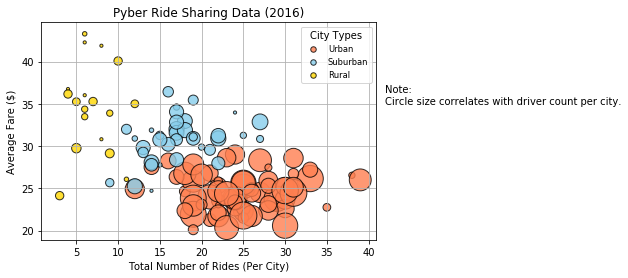

In [3]:
# Show plot
#plt.show()

## Total Fares by City Type

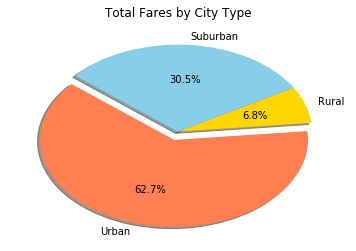

In [71]:
# Calculate Type Percents

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)
colors = ["coral", "gold", "skyblue"]
sizes = (urban_df["fare"].sum(), rural_df["fare"].sum(),suburban_df["fare"].sum())
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Total Fares by City Type")
#Save Figure
plt.savefig("Total Fares by City Type")

In [12]:
# Show Figure
#plt.show()

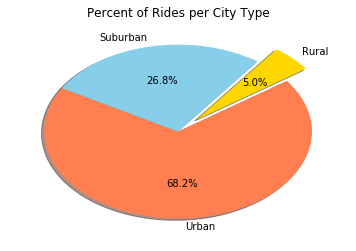

In [73]:
# Calculate Ride Percents

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
explode = (0, 0.2, 0)
colors = ["coral", "gold", "skyblue"]
sizes = (urban_df["ride_id"].sum(), rural_df["ride_id"].sum(),suburban_df["ride_id"].sum())
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=150)
plt.title("Percent of Rides per City Type")
# Save Figure
plt.savefig("Percent of Rides per City Type")

([<matplotlib.patches.Wedge at 0x9337c18>,
 [Text(0.876305,-0.664898,'Urban'),
  Text(-0.104947,1.29576,'Rural'),
  Text(-0.969614,0.519469,'Suburban')],
 [Text(0.477985,-0.362672,'68.2%'),
  Text(-0.0645825,0.797389,'5.0%'),
  Text(-0.52888,0.283347,'26.8%')])

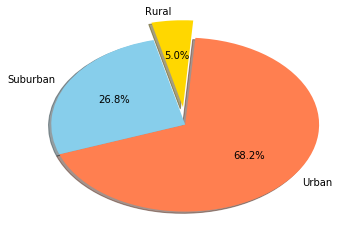

In [56]:
# Show Figure
#plt.show()


## Total Drivers by City Type

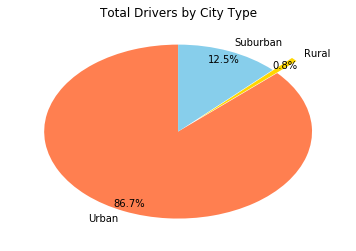

In [92]:
# Calculate Driver Percents

# Build Pie Charts
labels = ["Urban", "Rural", "Suburban"]
explode = (0, 0.2, 0)
colors = ["coral", "gold", "skyblue"]
sizes = (urban_df["driver_count"].sum(), rural_df["driver_count"].sum(),suburban_df["driver_count"].sum())
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=False, autopct="%1.1f%%", startangle=90, pctdistance=0.9 )
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("Drivers by City Type")

array([1625,  625,  125], dtype=int64)